In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix)

C:\Users\linyu\AppData\Local\Temp\ipykernel_24280\3459847097.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read data
df = pd.read_csv('dataset_phishing.csv')

In [3]:
features = ['shortest_word_path',
 'ratio_intMedia',
 'links_in_tags',
 'nb_hyphens',
 'page_rank',
 'avg_word_path',
 'ratio_extHyperlinks',
 'longest_words_raw',
 'google_index',
 'length_hostname',
 'longest_word_host',
 'domain_registration_length',
 'nb_www',
 'nb_underscore',
 'nb_dots',
 'ratio_extMedia',
 'phish_hints',
 'domain_in_title',
 'web_traffic',
 'safe_anchor',
 'nb_space',
 'shortening_service',
 'ip',
 'domain_age',
 'nb_qm',
 'nb_hyperlinks',
 'nb_slash']

In [4]:
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(df["status"])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters found: {'activation': 'tanh', 'alpha': 0.006, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.008, 'solver': 'sgd'}
Accuracy: 0.9618
Precision: 0.9606
Recall: 0.9623
F1 Score: 0.9614
ROC AUC Score: 0.9618


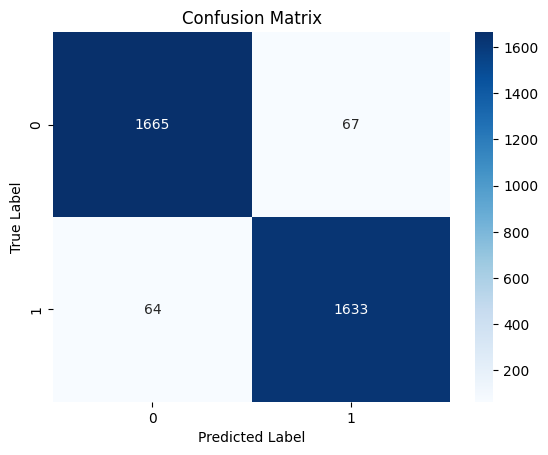

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=2000, random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.006],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.008]
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_mlp = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_mlp.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best hyperparameters found:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [6]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1665   67]
 [  64 1633]]


-

## Observations

**True Negatives (1665)**:
- The model correctly identified **1665 legitimate websites** as legitimate, demonstrating strong performance in avoiding false positives.

**False Positives (67)**:
- The model incorrectly classified **67 legitimate websites** as phishing. While this number is relatively low, it is crucial in phishing detection, as flagging legitimate sites could inconvenience users.

**False Negatives (64)**:
- The model missed **64 phishing websites**, classifying them as legitimate. This is a concern, as reducing false negatives would enhance recall and ensure that more phishing websites are detected.

**True Positives (1633)**:
- The model correctly identified **1633 phishing websites** as phishing. This indicates a high level of effectiveness in detecting phishing threats.

## Overall Performance:
- **Accuracy (96.18%)**: Very good performance overall.
- **Precision (96.06%)**: Excellent at avoiding false positives, ensuring that legitimate websites are rarely misclassified.
- **Recall (96.23%)**: Excellent at detecting true positives, indicating that the model is effective at identifying phishing attempts.
- **F1 Score (96.14%)**: Strong balance between precision and recall, suggesting the model performs well in both identifying phishing sites and minimizing false alerts.
- **ROC AUC Score (96.18%)**: Indicates a high capability of the model to distinguish between phishing and legitimate websites.

## Best Hyperparameters:
The best hyperparameters found for the model were:
- **Activation**: tanh
- **Alpha**: 0.006
- **Hidden Layer Sizes**: (100, 50)
- **Learning Rate**: constant
- **Learning Rate Init**: 0.008
- **Solver**: sgd
